In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Use GPU if available (faster calculations with PyTorch)

Matplotlib is building the font cache; this may take a moment.


In [2]:
words = open('../names.txt', 'r').read().splitlines()   # Python list of strings

print("First 10 names: ", words[:10])   # First ten names, each as separate string
print("Dataset size: ", len(words))     # Amount of words in dataset
print("Shortest name: ", min(len(w) for w in words))    # Smallest word in dataset
print("Longest name: ", max(len(w) for w in words))     # Longest word in dataset

First 10 names:  ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
Dataset size:  32033
Shortest name:  2
Longest name:  15


In [3]:
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [4]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): # Neat two-char 'sliding-window'
        bigram = (ch1, ch2) # bigram is the (ch1, ch2) tuple
        b[bigram] = b.get(bigram, 0) + 1 # If tuple count not ex. -> 0 + 1

In [5]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [6]:
# b.items() returns tuples like (('<S>', a), 34)
# sorted() would sort items by tuple, not amount
# to sort by amount: lambda function replaces key with value (amount) high->low
sorted(b.items(), key = lambda keyvalue: keyvalue[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
N = torch.zeros((28,28), dtype=torch.int32) # datatype would otherwise be float32 by default

# Problem: We'll have only chars, but below we index using ints -> Need for mapping
chars = sorted(list(set(''.join(words)))) # set(): Throwing out letter duplicates

# A mapping from letter to number
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

# Copied from above, but now modified for mapping
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]): # Neat two-char 'sliding-window'
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 # Increment cell in 2D by 1

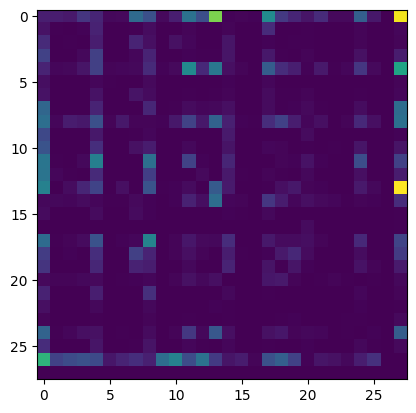

In [8]:
plt.imshow(N)

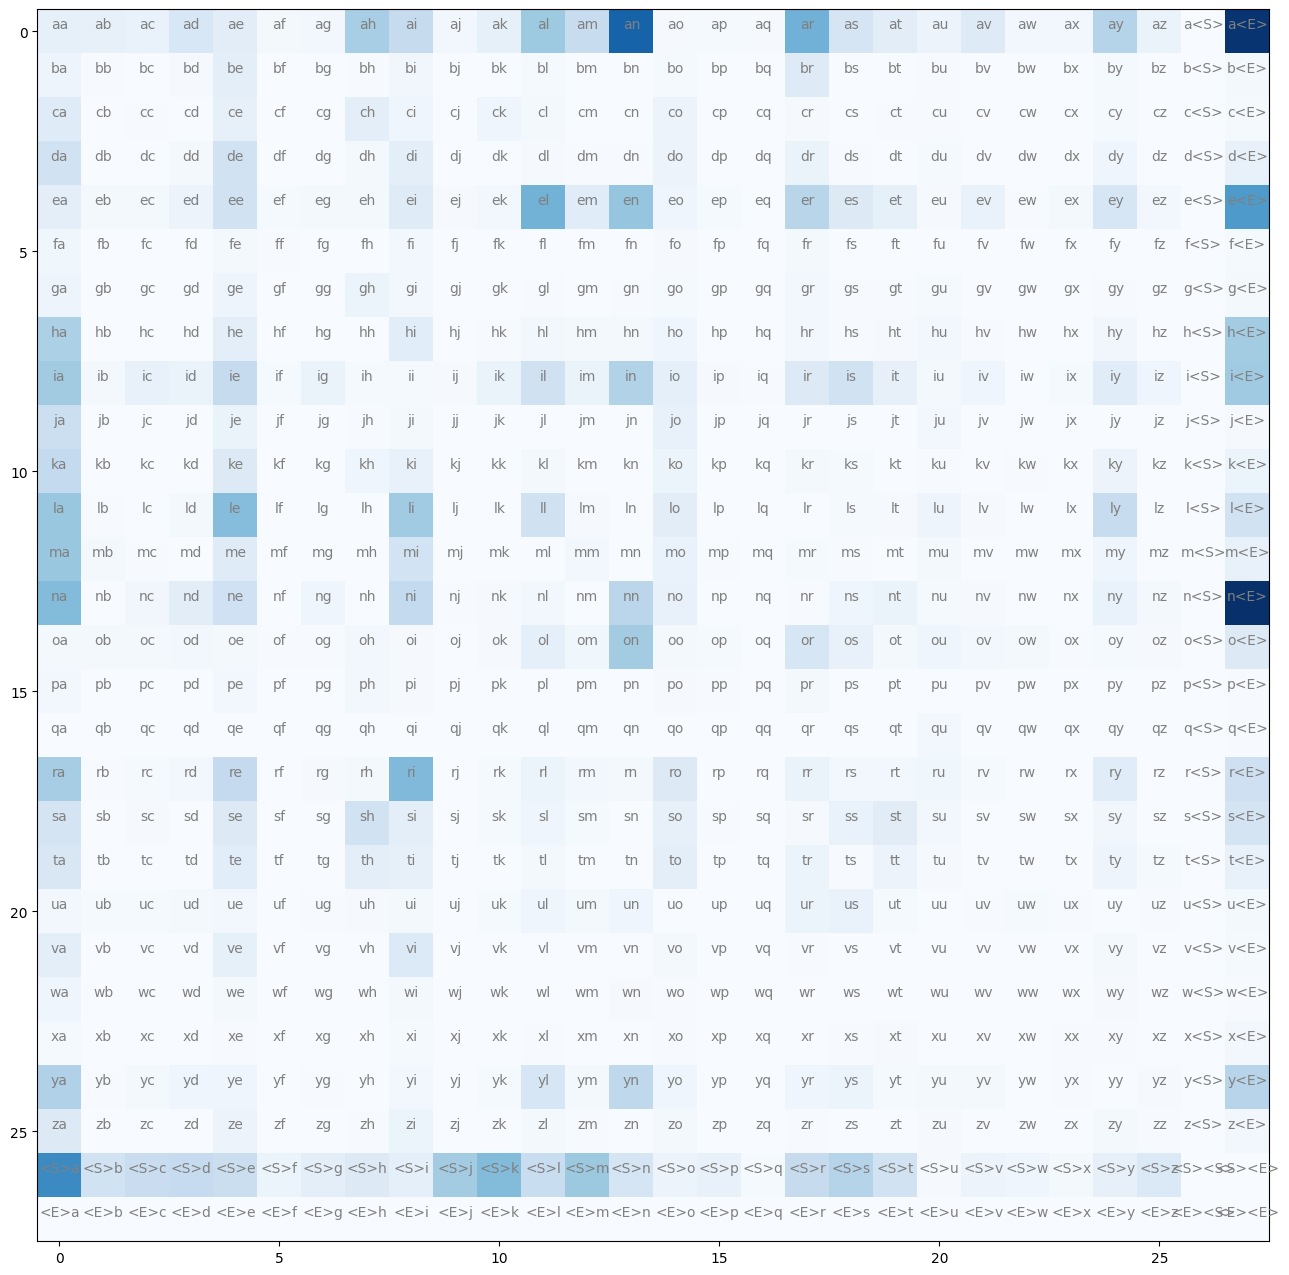

In [9]:
itos = {i:s for s, i in stoi.items()} # Basically reversing stoi element order

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues') # Heatmap basically
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j] # Add text for heat tiles
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

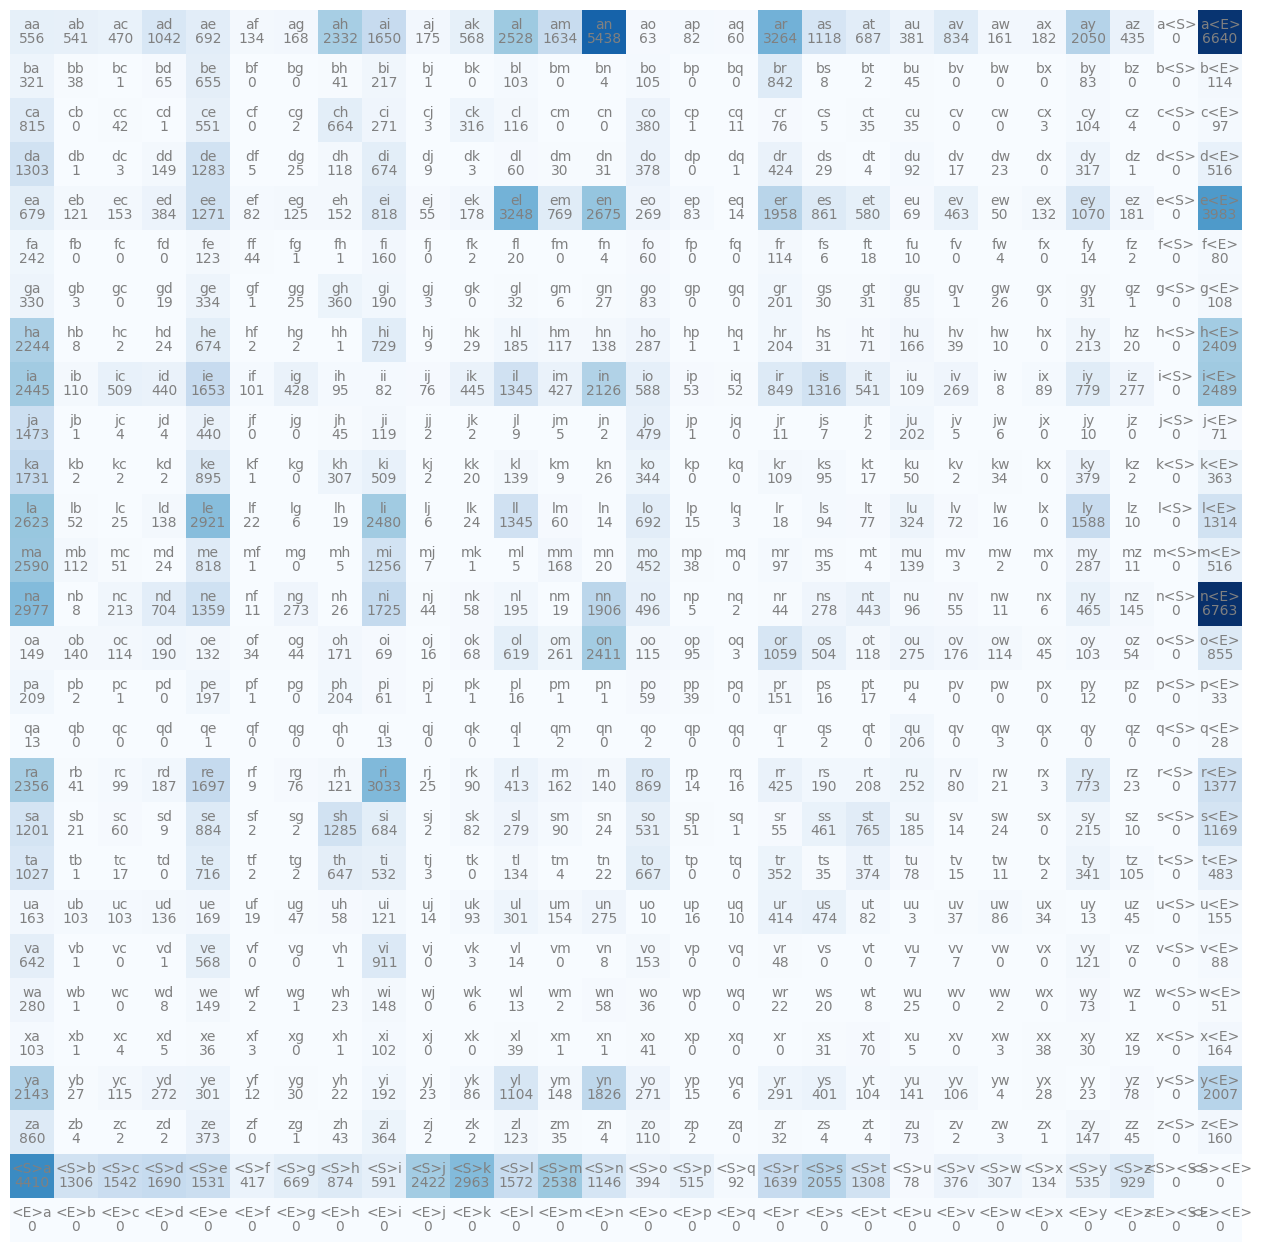

In [10]:
itos = {i:s for s, i in stoi.items()} # Basically reversing stoi element order

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues') # Heatmap basically
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j] # Add text for heat tiles
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [11]:
N = torch.zeros((27, 27), dtype=torch.int32) # 28x28 -> 27x27

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 # Our special character now has position zero
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

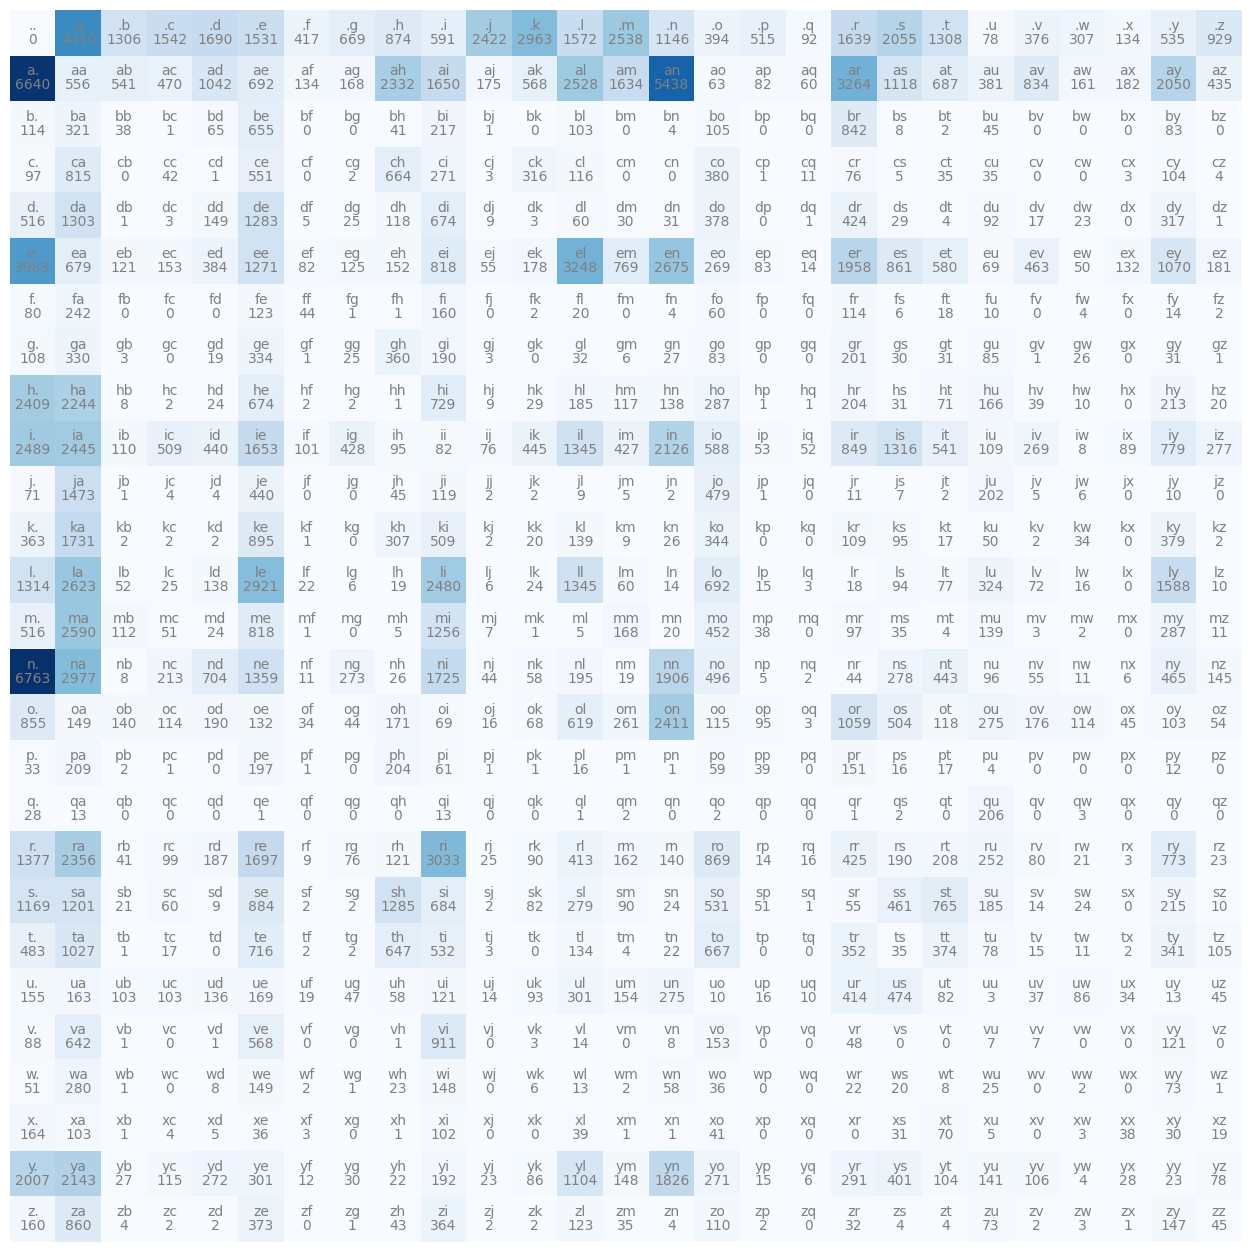

In [12]:
N = torch.zeros((27, 27), dtype=torch.int32) # 28x28 -> 27x27

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 # Our special character now has position zero
itos = {i:s for s,i in stoi.items()}

# Copied from above, but now modified
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]): # Neat two-char 'sliding-window'
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 # Increment cell in 2D by 1

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues') # Heatmap basically
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] # Add text for heat tiles
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [13]:
# Getting the entire zero-th row 
# (a 1D array of '.' and all letters following)
print("Raw first row's combination counts:\n", N[0], "\n")
print(N[0].shape)

Raw first row's combination counts:
 tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32) 

torch.Size([27])


In [14]:
p = N[0].float() # probability vector (np.array of floats)
p = p / p.sum()  # normalized probability distribution

print("First Row's distribution:\n", p)

First Row's distribution:
 tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


In [15]:
# Sampling from these distributions
# Torch.multinomial -> "Give me probability, I'll give you integer"
# We'll use a PyTorch Generator to make things random yet repeatable (deterministic)
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g) # Generate three random numbers [0;1]
p = p / p.sum()  # compact these random numbers into a distribution

# output: [0.6064, 0.3033, 0.0903]
print(p)

tensor([0.6064, 0.3033, 0.0903])


In [16]:
# With probability distribution p, create a list of 20 samples
# [replacement: true] means drawing an element doesn't invalidate drawing this element again
torch.multinomial(p, num_samples=1, replacement=True, generator=g)

# We'd expect ~60% of the 20 items to be 0, ~30% to be 1 , ~10% to be 2
# output: [1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]

tensor([0])

In [17]:
p = N[0].float() # probability vector
p = p / p.sum()  # normalized probability distributions

g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

# This is an index, a number representing a letter by probability
print(itos[ix]) # Convert index to letter

c


Question:

 How does torch.multinomial works? I get the logic that if take a lot of samples, the resulting distribution will match the defined distribution which is p here. But what happens under the hood, when only one sample is taken from this distribution. I get that the sample would be more likely be equal to the value with highest probability but how does the program makes sure that it is the case?

In [18]:
g = torch.Generator().manual_seed(2147483647)
n = 20

for i in range(n):
    ix = 0   # Start with special ('.', 'letter') token row
    out = [] # hold the n names to be generated
    while True:
        p = N[ix].float() # probability vector
        p = p / p.sum()   # normalized probability distributions
        # draw a single sample from this distribution, set this as new row index
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        # if we find ourselves back in the special ('.', 'letter') row, we're done with this name
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [19]:
P = N.float()
# P /= P.sum() # This would sum over all elements, row- and column-wise -> wrong
# This is allowed with PyTorch:
P /= P.sum(1, keepdims=True) # sum: A 27x1 vector (1 stands for row-wise sum) (27 by 27 divided by 27 by 1 is possible in PyTorch -> broadcasting)
# For broadcasting to work like here, each dimension must be either equal or 1 (or not existent), which is the case here (dimensions will be aligned from right to left!)
# Keepdim=True means that the sum vector is 27x1, (the 1 before that stating that the no. of rows is to be kept, but columns are to be summed over per row)

g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    ix = 0
    out = [] # Hold multiple names
    while True:
        p = P[ix]
        # draw a single sample from this distribution
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # If stopping special character is drawn
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [21]:
print(P.sum(1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
